# Sistem Kendali #

## Pemodelan Matematika ##

Program ini berisi beberapa contoh pemodelan matematika pada beberapa kejadian fisis yang terjadi disekitar kita. Model matematis sebuah proses ditentukan dengan  menggunakan Penurunan hukum fisika dan memiliki keunggulan antara lain 1) 
Lebih akuatr 2. 
Model yang dihasilkan semakin kompleks jika  memperhatikan detail stemis 3 m
Berpeluang menghasilkan model yang tidak linier


In [119]:
import sympy as sp

### Pemodelan pada Pegas ###

<img src="img/spring1.png">
input adalah $u$ dan output adalah jarak renggang $x$ Bagaimana model matematisnya?
<BR>Hukum Faraday: $F=ma$ dimana $m$ adalah masa (kg) dan $a$ adalah percepatan ($m/s^2$)dan $F$ adalah gaya dengan satuan Newton<BR>
<BR>Hooke Law terkait dengan gaya pada spring menyatakan $F_{spring}=-kx$  dimana $F_{spring}$ adalah gaya pada spring dengan satuan Newton, dan $-k$ adalah konstanta spring (stiffness dari spring) $x$ extension/peregangan pada spring.</BR>
<BR>Stooke Law terkait dengan friction menyatakan bahwa $F_{friction}=-{\rho}\dot{x}$ dimana $\rho$ adalah koefisien friction dan $\dot{x}$ adalah turunan pertama dari extension/pereganan pada spring.dimana: 
$$F = ma$$
Dengan $u$ sebagai daya tarik, maka kita bisa mendapatkan persamaan bahwa:
<BR>$F=F_{spring}+F_{friction}+u$

In [120]:
v, m,a,x,k,u,xd,xdd, rho = sp.symbols(r'v, m,a,x,k,u,\dot{x},\ddot{x},\rho')
Fn = m*a
display("Persamaan F:", Fn)
Hooke = -k*x
display("Persamaan F_spring:", Hooke)
Stoke = -rho*xd
display("Persamaan F_frinction:", Stoke)
Eq=Hooke+Stoke+u
display('Persamaan F:',Eq)
print(sp.latex(Eq)) 

'Persamaan F:'

a*m

'Persamaan F_spring:'

-k*x

'Persamaan F_frinction:'

-\dot{x}*\rho

'Persamaan F:'

-\dot{x}*\rho - k*x + u

- \dot{x} \rho - k x + u


$$F = - \dot{x} \rho - k x + u$$

sehingga,
$$ma = - \dot{x} \rho - k x + u $$

Note bahwa x adalah jarak renggang dan turunan pertama dan keduanya merupakan:
$\dot{x}=v$ dan $\ddot{x}=a$

sehingga: 
$$ m\ddot{x} = - \dot{x} \rho - k x + u $$
$$ \ddot{x}=\frac{ - \dot{x} \rho - k x + u}{m}$$

In [121]:
Eq=Hooke+Stoke-Fn+u
display("Persamaan F_spring+F_frinction+u-F:", Eq)
Eq = Eq.subs([(a,xdd)])
display("substitusi a dengan x_double_dot",Eq)

'Persamaan F_spring+F_frinction+u-F:'

-\dot{x}*\rho - a*m - k*x + u

'substitusi a dengan x_double_dot'

-\ddot{x}*m - \dot{x}*\rho - k*x + u

In [122]:
Eq10 = Eq/m
display("Persamaan ", Eq10.simplify())

'Persamaan '

(-\ddot{x}*m - \dot{x}*\rho - k*x + u)/m

## State Space Equation ##
persamaan terakhir:
$$ \ddot{x}=\frac{ - \dot{x} \rho - k x + u}{m}$$

ingat: $u$ adalah input dan $x$ adalah output

Variabel yang dipilih sebagai state space adalah: $x_1 = x$  dan $x_2 = \dot{x}$ sehingga

$$ \dot{x_2} = \ddot{x}$$

sehingga terdapat dua persamaan:

(1) $$ \dot{x_1} = x_2 $$ 
(2) $$ \dot{x_2}=\frac{ - {x_2} \rho - k x_1 + u}{m}$$



In [123]:
x1,x2 = sp.symbols('x_1,x_2')
Eq11 = Eq10.subs([(x,x1),(xd,x2)])
display(Eq11)

(-\ddot{x}*m - \rho*x_2 - k*x_1 + u)/m

Persamaan State Space dapat menggunakan rumus dibawah ini: 
$$x={A}{\dot{x}}+Bu$$
$$y=Cx+Du$$
Berdasarkan persamaan diatas, maka didapatkan matrix $A$, $B$, $C$ untuk pemodelan pada pegas
sehingga
$${x} = \begin{bmatrix} {x_1}\\{x_2}\end{bmatrix}$$

Diketahui:
$${A} = \begin{bmatrix} {0} & {1} \\ -\frac{k}{m} & -\frac{\rho}{m}\end{bmatrix}$$
$${B} = \begin{bmatrix} {0}\\{\frac{1}{m}}\end{bmatrix}$$
$${C} = \begin{bmatrix} 1 & 0\\ 0 & 1\end{bmatrix}$$
$${D} = 0 $$
Hitung:
$$\frac{Y(s)}{U(s)} = {C[sI−A]^{−1}}B+D $$

In [125]:
A_Row_1 = (0,1)
A_Row_2 = (-k/m,-rho/m)
A  = sp.Matrix([A_Row_1,A_Row_2])
display('Matrix A:',A)
print("\n")
B_Row_1 = (0)
B_Row_2 = (1/m)
B = sp.Matrix([B_Row_1,B_Row_2])
display('Matrix B:',B)
C_Row_1 = (1,0)
C_Row_2 = (0,1)
C = sp.Matrix([C_Row_1,C_Row_2])
display('Matrix C:',C)

'Matrix A:'

Matrix([
[   0,       1],
[-k/m, -\rho/m]])

'Matrix B:'

Matrix([
[  0],
[1/m]])

'Matrix C:'

Matrix([
[1, 0],
[0, 1]])

## Transfer Function ##
Transfer function dalam sistem kontrol merupakan representasi matematis dari hubungan antara input dan output suatu sistem. Transfer function ini menggambarkan bagaimana sistem akan merespons terhadap input yang diberikan dalam bentuk fungsi matematis. Dengan menggunakan transfer function, kita dapat menganalisis karakteristik sistem, seperti stabilitas, kecepatan respon, dan redaman. Dalam bentuk matematis, transfer function biasanya dinyatakan sebagai rasio antara transformasi Laplace dari output dengan transformasi Laplace dari input pada kondisi keadaan tunak (steady-state).

Transfer function adalah the Laplace Transform dari  State Space Equation

$$sX(s)=AX(s)+Bu(s)$$
$$Bu(s)=sX(s)−AX(s)$$  
$$Bu(s)=[sI−A]X(s)$$
$$X(s)= [sI−A]^{−1}Bu(s)$$  

$$Y(s)=CX(s)+Du(s)$$; Substitute X(s)  from above 
$$Y(s)=(C[sI−A])^{−1}$$ $$BU(s)+Du(s)$$ ; Separate u(s)
$$Y(s)=(u(s)(C[sI−A])^{−1} B+D)$$
Sehingga bisa kita dapatkan formula transfer function adalah sebagai berikut:
$$\frac{Y(s)}{u(s)} =C[sI−A]^{−1} B+D$$


In [144]:
display(A,B,C)
s = sp.Symbol('s')
I = sp.eye(A.shape[0])
display(I)
inv_M=(I*s - A).inv()
display(inv_M)
TFL = C*inv_M*B 
TFLX1 = TFL[0]
TFLX2 = TFL[1]
display("Transfer Function Pegas didapatkan:",TFL)
display("Transfer Function Pegas x1 didapatkan:",TFLX1)
display("Transfer Function Pegas x2 didapatkan:",TFLX2)

Matrix([
[   0,       1],
[-k/m, -\rho/m]])

Matrix([
[  0],
[1/m]])

Matrix([
[1, 0],
[0, 1]])

Matrix([
[1, 0],
[0, 1]])

Matrix([
[(\rho + m*s)/(\rho*s + k + m*s**2),   m/(\rho*s + k + m*s**2)],
[          -k/(\rho*s + k + m*s**2), m*s/(\rho*s + k + m*s**2)]])

'Transfer Function Pegas didapatkan:'

Matrix([
[1/(\rho*s + k + m*s**2)],
[s/(\rho*s + k + m*s**2)]])

'Transfer Function Pegas x1 didapatkan:'

1/(\rho*s + k + m*s**2)

'Transfer Function Pegas x2 didapatkan:'

s/(\rho*s + k + m*s**2)

## Frequency Response ##

Ingat prinsip sistem LTI (Linear Time Invariant) bentuk signal pada input akan mirip dengan bentuk signal output. Dimana perubahan terletak pada gain (selisih antar amplitude input dan output) dan phase (selisih shifting sumbu x antar signal input dan output).
<img src="img/gain-phase.png"></img>
Istilah "gain" atau penguatan dituliskan dalam besaran dB. Explaining phase a bit hard in this markdown. Saya menyarankan <a href="https://www.youtube.com/watch?v=_eh1conN6YM"> youtube </a> untuk mendapatkan feel dari laplace, real, imaginary part dan phase. karena $s=j\omega$ dimana $gain=\sqrt{re^2+im^2}$ dan $phase=tan^{-1}(im/re)$ dan bentuk visual dari gain dan phase digambarkan dengan bode plot. Next step, mari kita membuat Bode plot dengan fungsi alih dari sistem diatas.



'TF X1 setelah variabel k, m, dan rho dimasukkan:'

1/(4*s**2 + 2.5*s + 66)

Konversi ke bentuk sympy Transfer Function
TF X1 setelah variabel k, m, dan rho dimasukkan: TransferFunction(1, 4*s**2 + 2.5*s + 66, s)


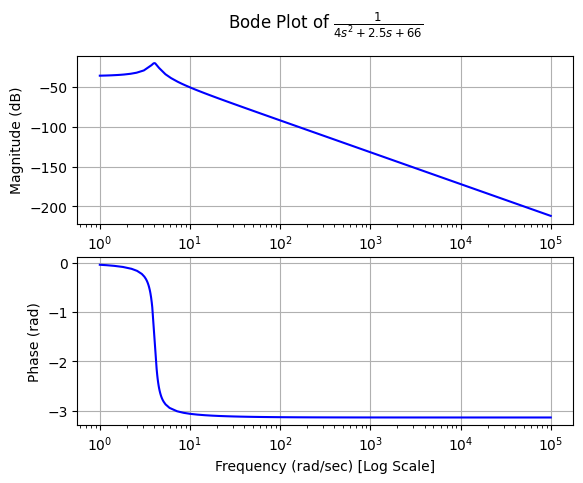

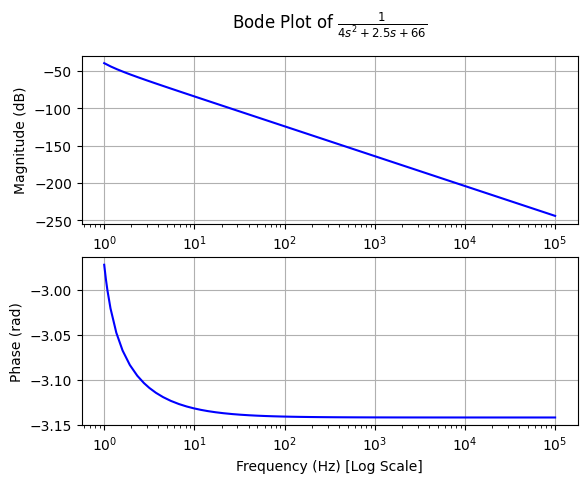

In [200]:
from sympy import fraction
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import bode_plot, pole_zero_plot, impulse_response_plot, step_response_plot

kv =66 #satuan N/m^2
mv = 4 #satuan Kg
rhov = 2.5 #satuan N/m^2
#substitute above value to the transfer function. 
TFLX1v = TFLX1.subs([(k,kv),(m,mv),(rho,rhov)])
TFLX2v = TFLX2.subs([(k,kv),(m,mv),(rho,rhov)])
display("TF X1 setelah variabel k, m, dan rho dimasukkan:", TFLX1v)
#untuk menggunakan fungsi Transfer Function, perlu dipecah numerator dan denominator
num,den = fraction(TFLX1v)
num1,den1= fraction(TFLX2v)
print("Konversi ke bentuk sympy Transfer Function")
TFX1 = TransferFunction(num,den,s)
TFX2 = TransferFunction(num1,den1,s)
print("TF X1 setelah variabel k, m, dan rho dimasukkan:",TFX1)
#Finally! cetak bode plot
bode_plot(TFX1, initial_exp=0.001, final_exp=5,freq_unit='rad/sec')   
#Instead of menggunakan omega, kita bisa cetak dalam bentuk hertz
bode_plot(TFX1, initial_exp=0, final_exp=5, freq_unit ='Hz')   

## Impulse Response ##
Impulse Response adalah reaksi dari setiap sistem dinamis sebagai respons terhadap perubahan eksternal tertentu.  Impulse Response menggambarkan reaksi sistem sebagai fungsi waktu.

Response X1


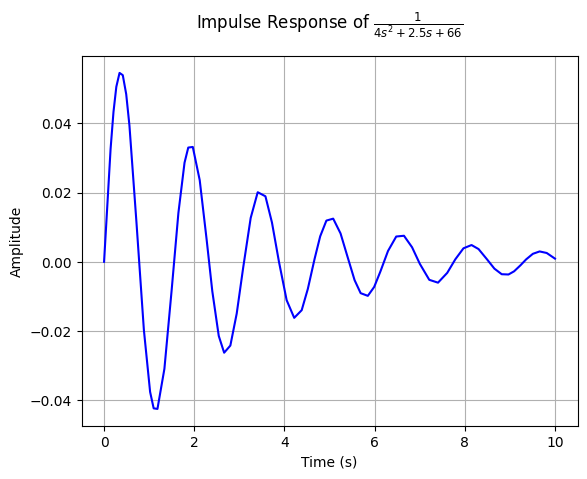

Response X2


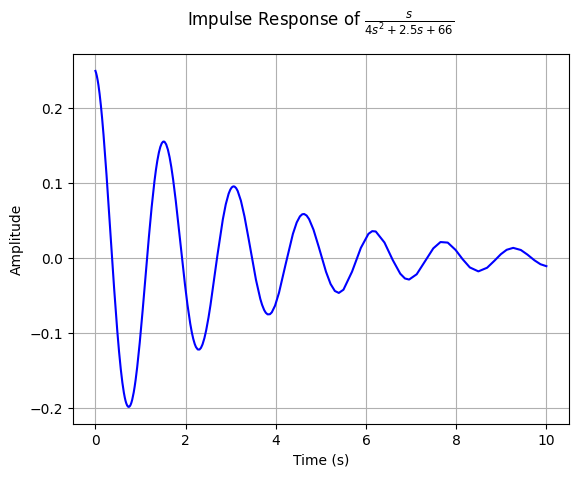

In [201]:
#pole_zero_plot(TFX1)   
print("Response X1")
impulse_response_plot(TFX1)
#step_response_plot(TFX1)
print("Response X2")
impulse_response_plot(TFX2)
#step_response_plot(TFX2) 

## Pertanyaan ## 
Dapatkah rekan-rekan melihat hubungan antara impulse response dan frequency response? Jelaskan di kelas